# Credit Card Fraud Detection

### Problem: 
#### Develop a Machine Learning Model to Identify the fradulent transactions

In this notebook, I have developed a machine learning algorithm to identify credit card frauds. In the notebook, I have used the credit card fraud data from Kaggle. This data was compiled in 2013 from European users. 

#### Approach:

This probelm is essentially a classification one. We are focussed on classifying the target variable into either fraudelent or non-fraudulent transactions. 

I have conducted an exploratory data analysis on the dataset and have then performed an analysis of the descriptive statistics. The card numbers have been blocked out in the dataset. 

The dataset can be found here [Kaggle Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). 

I have divided the notebook in the following parts:
- Data Loading 
- Descriptive Statistics
- Exploratory Data Analysis
- Data Preprocessing
- Developing the ML Algos
- Running metrics on the predicted output

# Data and Package Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Loading the data in the variable df
df = pd.read_csv('creditcard.csv')
#Printing the head of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataframe has 31 columns in total, out of which the 'Class' attribute is the target column and the other columns are the descriptive ones. 

I will be delving deep into each of the columns in the dataset and will be visualizing the trends. I will first be describing the datset, by isolating each of the features. I will also be identifying the types of the data held by each of the columns. 

## Data Exploration

In [3]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
df.dtypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

I will now be checking if any of the data points are duplicated or not. 

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

### Plots
#### Histogram

In the below section, I am plotting the histogram of the numerical columns in the dataset to understand the distribution of the data.


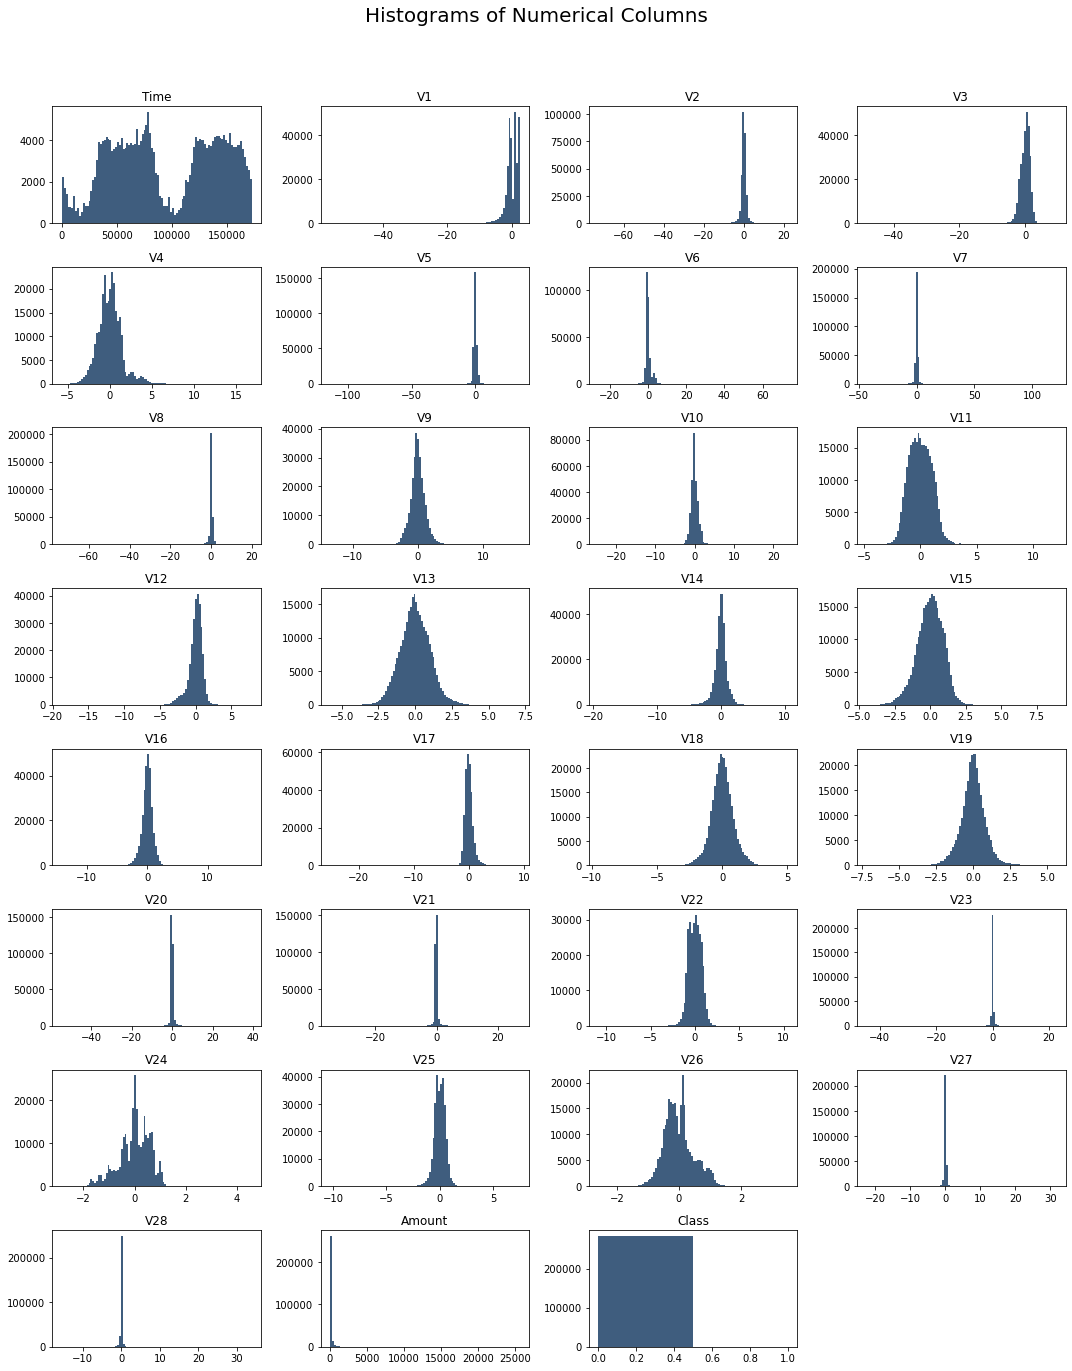

In [6]:
# Plotting the histogram of the numerical columns in the dataset. 

#Setting up the size of the image
fig = plt.figure(figsize=(15, 20))
#Fixing the title of the plot
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

#Running the for loop to plot through all the columns
for i in range(df.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100          
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7E')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

From the above plots we can see that the class column is significantly imbalanced so its better to undertsand the how many of them are frauds and how many of them are actual trasactions. 

In [7]:
# Printing the Number of Fraudulent transactions per 100,000 transactions. 
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(df[df.Class==1]), len(df[df.Class==1])/len(df)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


## Correlation

In the below lines of code, I have tried to identify the correlation between the individual columns. 

In [8]:
#Plotting the correlation of the columns. 
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


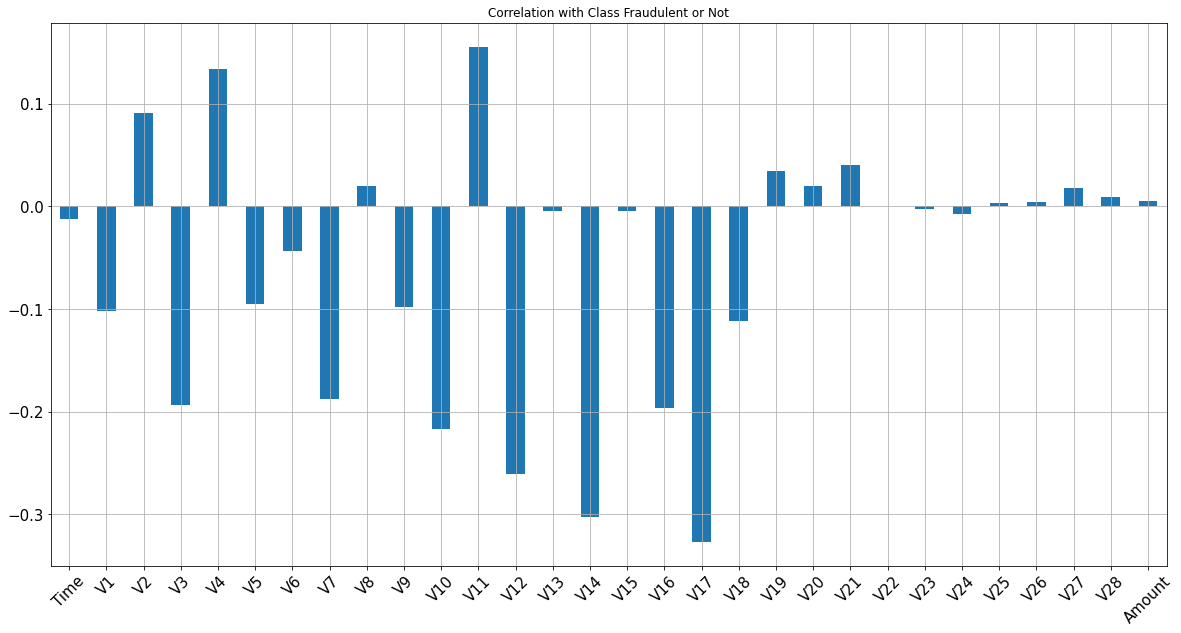

In [9]:
# I am printing the linear correlation with the REsponse Variable (Class)

df2 = df.drop(columns = ['Class'])   # drop non numerical columns
df2.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

I will now try to understand the relationship between fraudulent and the non-fraudulent transactions against time. 

C:\Users\mit_b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mit_b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


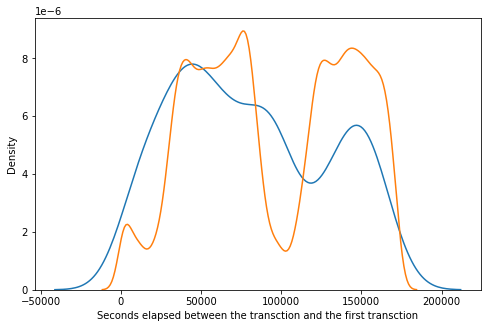

In [10]:
#In the below code, I am isolating the fraudulent and the non-fraudulent transactions and plotting them as per time.  

#Isolating the fraudulent transactions in data_fraud
data_fraud = df[df['Class'] == 1]
#Isolating the non-fraudulent transactions in data_non_fraud
data_non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

## Data Splitting

In [11]:
#Splitting the dataset intro training and testing. 

#The target column of the datset is the 'Class'

X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest

In [12]:
#Importing the RandomForestClassifier

#Training the model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())    
RandomForestClassifier()

#Predicting based on the test data
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9996063285347974

<AxesSubplot:>

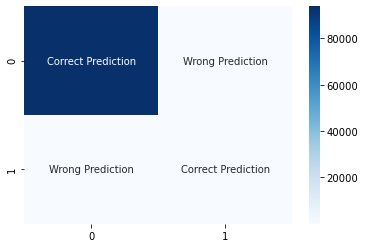

In [13]:
#Confusion Matrix

cnf_matrix = confusion_matrix(y_test,y_pred)
#Setting the labels in the plot
labels = ['Correct Prediction','Wrong Prediction','Wrong Prediction','Correct Prediction']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [14]:

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

accuracy:0.9996 	precision:0.9516 	recall:0.7919 	F1-score:0.8645


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999606,0.208054,0.791946,0.951613,0.864469


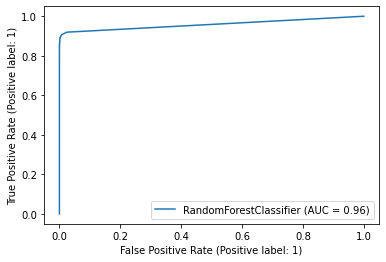

In [15]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

## Decision Tree

<AxesSubplot:>

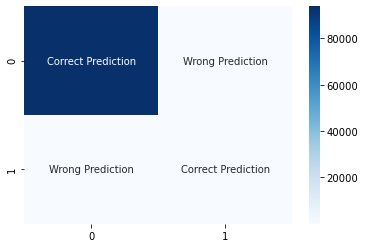

In [16]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.values.ravel())
DecisionTreeClassifier()
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
labels = ['Correct Prediction','Wrong Prediction','Wrong Prediction','Correct Prediction']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

accuracy:0.9991 	precision:0.6994 	recall:0.8121 	F1-score:0.7516


<ipython-input-17-e7b8ac2ba052>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_testset = results_testset.append(model_results, ignore_index = True)


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999606,0.208054,0.791946,0.951613,0.864469
1,DecisionTree,0.999149,0.187919,0.812081,0.699422,0.751553


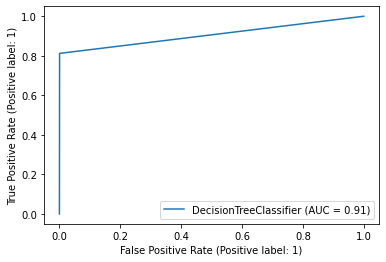

In [18]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

In [19]:
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999606,0.208054,0.791946,0.951613,0.864469
1,DecisionTree,0.999149,0.187919,0.812081,0.699422,0.751553


## Discussion

From the notebook, it is clear that the number of fraudulent transactions is significantly lesser than the non-fraudulent ones. It is also observable from the plots that this is not much dependent on the passage of time. The results of running the two classification algorithms on the data is also quite encouraging as the accuracy of both the algorithms is pretty good. Both the random forest and the Decision Tree are giving quite high accuracy on the test dataset.